In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]
import csv

In [49]:
# walk2d_df = pd.DataFrame(pd.read_csv("../data_files/randomwalk2d.csv", index_col=0, header=None))
df = pd.DataFrame(pd.read_csv("../data_files/randomwalk2d.csv"))
print(df)

           x        y
0    499.000  499.000
1    499.700  499.714
2    500.109  500.627
3    499.418  499.904
4    499.334  500.900
..       ...      ...
995  492.736  457.219
996  492.904  458.205
997  492.019  457.739
998  492.806  457.123
999  492.021  457.742

[1000 rows x 2 columns]


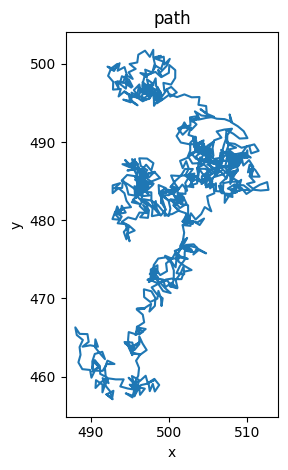

In [50]:
fig, ax = plt.subplots()

x = df["x"]
y =  df["y"]

t = "path"
# plt.plot(x,y, marker='o', ms=1, linestyle='None')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
ax.set_title(t)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

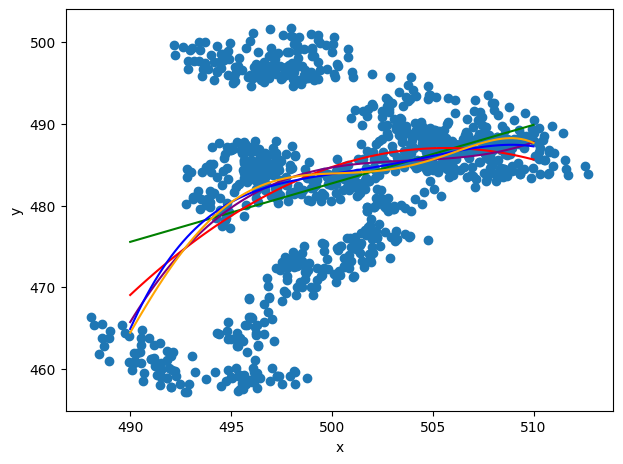

{'r_squared': 0.12315008636599967}
{'r_squared': 0.16392930956948282}
{'r_squared': 0.17784165448276346}
{'r_squared': 0.18300821206850515}
{'r_squared': 0.18603241287450467}


In [51]:
t = "path"
# plt.plot(x,y, marker='o', ms=1, linestyle='None')
plt.xlabel('x')
plt.ylabel('y')
ax.set_title(t)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()

model1 = np.poly1d(np.polyfit(df.x, df.y, 1))
model2 = np.poly1d(np.polyfit(df.x, df.y, 2))
model3 = np.poly1d(np.polyfit(df.x, df.y, 3))
model4 = np.poly1d(np.polyfit(df.x, df.y, 4))
model5 = np.poly1d(np.polyfit(df.x, df.y, 5))
model5 = np.poly1d(np.polyfit(df.x, df.y, 100))

#create scatterplot
polyline = np.linspace(490, 510, 100)
plt.scatter(df.x, df.y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')
plt.plot(polyline, model100(polyline), color='black')
plt.show()

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
print(adjR(df.x, df.y, 1))
print(adjR(df.x, df.y, 2))
print(adjR(df.x, df.y, 3))
print(adjR(df.x, df.y, 4))
print(adjR(df.x, df.y, 5))
print(adjR(df.x, df.y, 100))